In [1]:
# standard
import pandas as pd
import numpy as np
import random
import os

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
# import mlxtend
# from mlxtend.plotting import scatterplotmatrix
# from mlxtend.plotting import heatmap

# others
import re
from sklearn.decomposition import PCA
from collections import Counter

# ML
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, log_loss
from sklearn.metrics import recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import Precision
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

## Input

In [2]:
# for Google Collab
# from google.colab import files
# uploaded = files.upload()

In [3]:
# Get the file name from the uploaded dictionary
# RUN ONLY ONCE on Colab
# filename = list(uploaded.keys())[0]
# print(f"Uploaded file name: {filename}")

# df = pd.read_csv(filename)

# # Display the first few rows of the DataFrame
# print(f"Full dataframe shape: {df.shape}")
# print(df.head())
# print(f"Column names:\n{df.columns}")

In [4]:
# Laptop

current_dir = os.getcwd()
#DATA_PATH = current_dir + '/Datasets'
%matplotlib inline
print(current_dir)

df = pd.read_csv('./spotify_data.csv')
# Display the first few rows of the DataFrame
print(f"Full dataframe shape: {df.shape}")
print(df.head())
print(f"Column names:\n{df.columns}")
df.head()

c:\Users\uriel\OneDrive\Documents\MIDS-Praxis-22\DS_207\Project
Full dataframe shape: (1159764, 20)
   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  loudness  mode  \
0          68  2012  acoustic         0.483   0.303    4   -10.058     1   
1          50  2012  acoustic         0.572   0.454    3   -10.286     1   
2          57  2012  acoustic         0.409   0.234    3   -13.711     1   
3          58  2012  acoustic         0.392   0.251   10    -9.845     1   
4          54  2012  acoustic         0.430   0.791    6    -5.419     0   

,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,2012,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,2012,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,2012,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,2012,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,2012,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


## EDA

In [5]:
print(df.columns)
print(df.dtypes)

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
Unnamed: 0            int64
artist_name          object
track_name           object
track_id             object
popularity            int64
year                  int64
genre                object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object


count    1.159764e+06
mean     1.838312e+01
std      1.588554e+01
min      0.000000e+00
25%      5.000000e+00
50%      1.500000e+01
75%      2.900000e+01
max      1.000000e+02
Name: popularity, dtype: float64


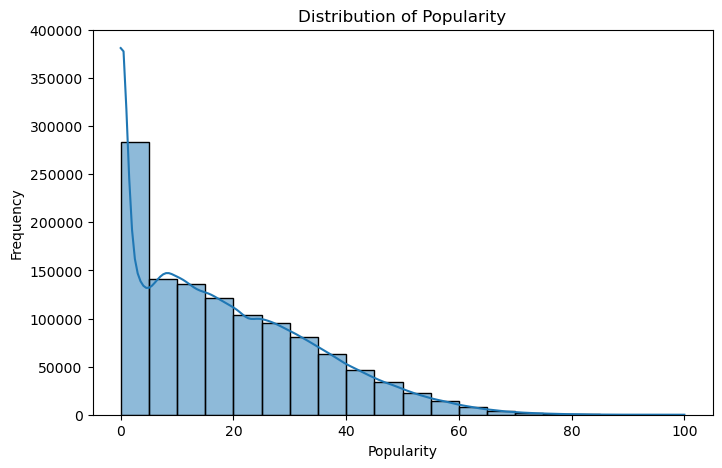

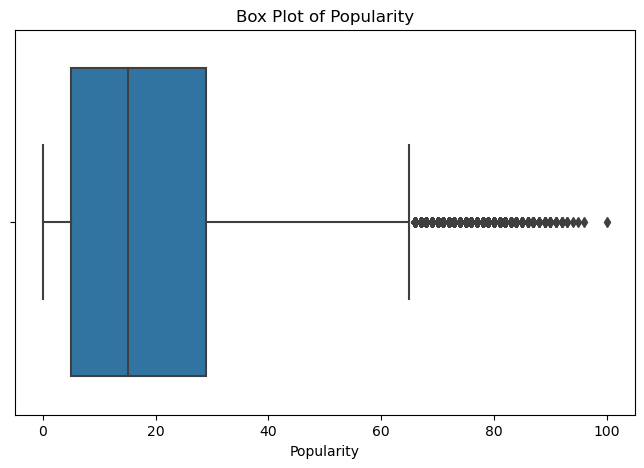

In [6]:
# Descriptive statistics
print(df['popularity'].describe())

# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['popularity'], bins=20, kde=True)
plt.title('Distribution of Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['popularity'])
plt.title('Box Plot of Popularity')
plt.xlabel('Popularity')
plt.show()

In [7]:
# Group by 'genre' and calculate the mean popularity
genre_popularity = df.groupby('genre')['popularity'].mean().sort_values(ascending=False)

# Display the top genres by average popularity
print(genre_popularity.head(10))

genre
pop          55.685806
hip-hop      46.315736
rock         46.228985
dance        43.034337
metal        39.698860
alt-rock     38.596807
sad          36.122248
indie-pop    35.518260
folk         33.448547
country      33.047419
Name: popularity, dtype: float64


In [8]:
df['genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'ambient', 'black-metal',
       'blues', 'breakbeat', 'cantopop', 'chicago-house', 'chill',
       'classical', 'club', 'comedy', 'country', 'dance', 'dancehall',
       'death-metal', 'deep-house', 'detroit-techno', 'disco',
       'drum-and-bass', 'dub', 'dubstep', 'edm', 'electro', 'electronic',
       'emo', 'folk', 'forro', 'french', 'funk', 'garage', 'german',
       'gospel', 'goth', 'grindcore', 'groove', 'guitar', 'hard-rock',
       'hardcore', 'hardstyle', 'heavy-metal', 'hip-hop', 'house',
       'indian', 'indie-pop', 'industrial', 'jazz', 'k-pop', 'metal',
       'metalcore', 'minimal-techno', 'new-age', 'opera', 'party',
       'piano', 'pop', 'pop-film', 'power-pop', 'progressive-house',
       'psych-rock', 'punk', 'punk-rock', 'rock', 'rock-n-roll',
       'romance', 'sad', 'salsa', 'samba', 'sertanejo', 'show-tunes',
       'singer-songwriter', 'ska', 'sleep', 'songwriter', 'soul',
       'spanish', 'swedish', 'tango', 'tec

## SALSA genre

In [9]:
salsa_df = df[df['genre'] == 'salsa']
print("Salsa df shape is:", salsa_df.shape)
salsa_df.head()

Salsa df shape is: (17501, 20)


,Unnamed: 0,artist_name,track_name,track_id,popularity,year,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
45078,45078,Víctor Manuelle,Si Tú Me Besas,5981zpjMYeKGoEQ6K9794L,57,2012,salsa,0.760,0.667,7,-8.384,1,0.0404,0.700,0.0,0.1040,0.742,102.918,259853,4
45079,45079,Víctor Manuelle,Ella Lo Que Quiere Es Salsa (feat. Voltio & Jo...,6l9iRzgakAc5U82eVbt8ow,45,2012,salsa,0.788,0.748,0,-7.237,0,0.0729,0.523,0.0,0.1330,0.952,97.439,240293,4
45080,45080,Willie Colón,Sin Poderte Hablar,3SJj8sSpkMuSWXd2P7mfRR,48,2012,salsa,0.413,0.691,5,-5.763,0,0.0502,0.137,0.0,0.5830,0.581,102.063,324000,4
45081,45081,Frankie Ruiz,Que se Mueran de Envidia,2W9xTnIUe3GIazrKkExnHM,47,2012,salsa,0.637,0.802,2,-7.597,1,0.0331,0.429,0.0,0.2020,0.919,100.123,256287,4
45082,45082,Guaco,Vivo,537KE6mr2r62jIp1036Stq,45,2012,salsa,0.765,0.842,9,-5.305,1,0.0535,0.288,0.0,0.0769,0.896,109.963,207693,4


In [10]:
# top avg salsa artists
salsa_artists = salsa_df.groupby('artist_name')['popularity'].mean().sort_values(ascending=False)

# Display the top 10 artist by avg
print("Top 10 artist(s) in the 'salsa' genre:")
print(salsa_artists.head(10))  # Top 10 artist by average popularity


Top 10 artist(s) in the 'salsa' genre:
artist_name
Salsa Kids                        57.00000
Rimante                           41.00000
Roberto Santamaria                40.00000
Bembe Orquesta                    39.50000
Elmer Hurva                       38.00000
Manuelito Y Su Trabuco            37.00000
Musinova                          36.00000
Dj Faricho                        35.50000
Yiyo Sarante                      34.40678
Los Conquistadores de la Salsa    34.00000
Name: popularity, dtype: float64


In [11]:
print("top salsa song:\n", salsa_df[['track_name','artist_name', 'popularity']][salsa_df['popularity']== salsa_df['popularity'].max()])

print("\ntop salsa songs\n", salsa_df.sort_values(by='popularity', ascending=False)[['track_name','artist_name', 'popularity']].head(10))

top salsa song:
                     track_name   artist_name  popularity
1105380  Talento De Televisión  Willie Colón          70

top salsa songs
                                    track_name            artist_name  \
1105380                 Talento De Televisión           Willie Colón   
964577       Conteo Regresivo - Salsa Version    Gilberto Santa Rosa   
873268                            Aquel Lugar  Adolescent's Orquesta   
467284                      Algo Que Se Quede            Grupo Niche   
299345                  Ven Devórame Otra Vez         Lalo Rodriguez   
521190                        Manos de Tijera           Yiyo Sarante   
299342                          Eres Mi Sueño         Septeto Acarey   
467761   Fabricando Fantasías - Salsa Version            Tito Nieves   
299339                            Ni Siquiera      Antonio Cartagena   
299337                               Lloraras           Oscar D'León   

         popularity  
1105380          70  
964577        

In [12]:
# Feature Clean-up etc

drop_vars = ['track_name','artist_name', 'genre', 'track_id', 'Unnamed: 0']
salsa_df = salsa_df.drop(columns=drop_vars)

# added for preprocessor (standardize and encoding)
numerical_features =  ["danceability", "energy", "loudness", "speechiness", "acousticness", "liveness", "valence","tempo", "duration_ms", "mode"]
categorical_features = ['year', "key", "time_signature"]

cat_var = categorical_features

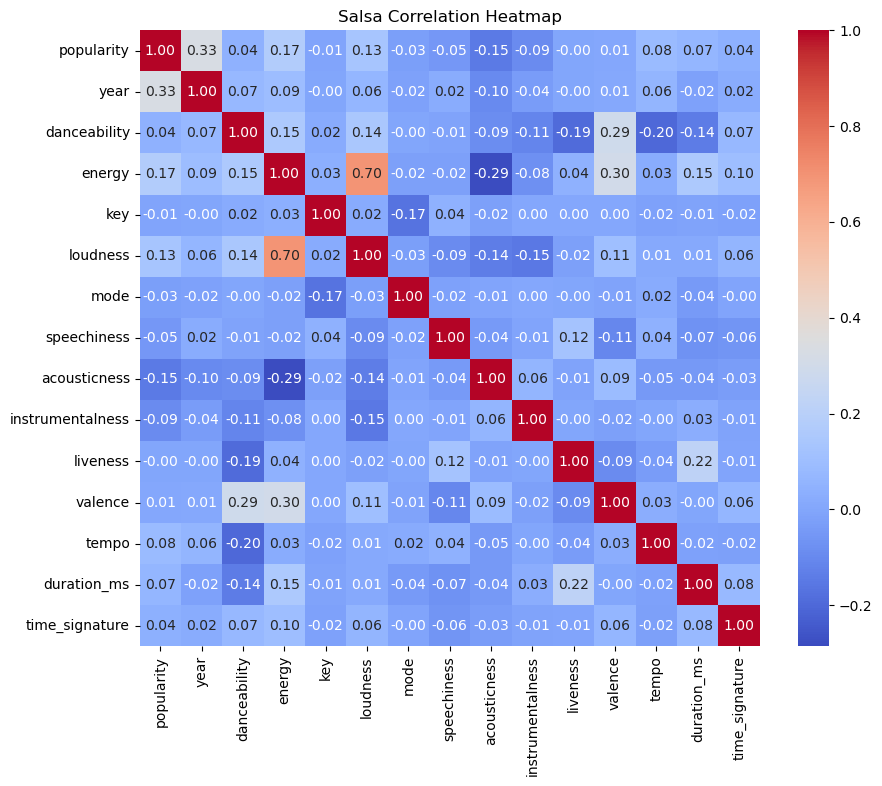

In [13]:
salsa_corr_mat = salsa_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(salsa_corr_mat, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Salsa Correlation Heatmap')
plt.show()

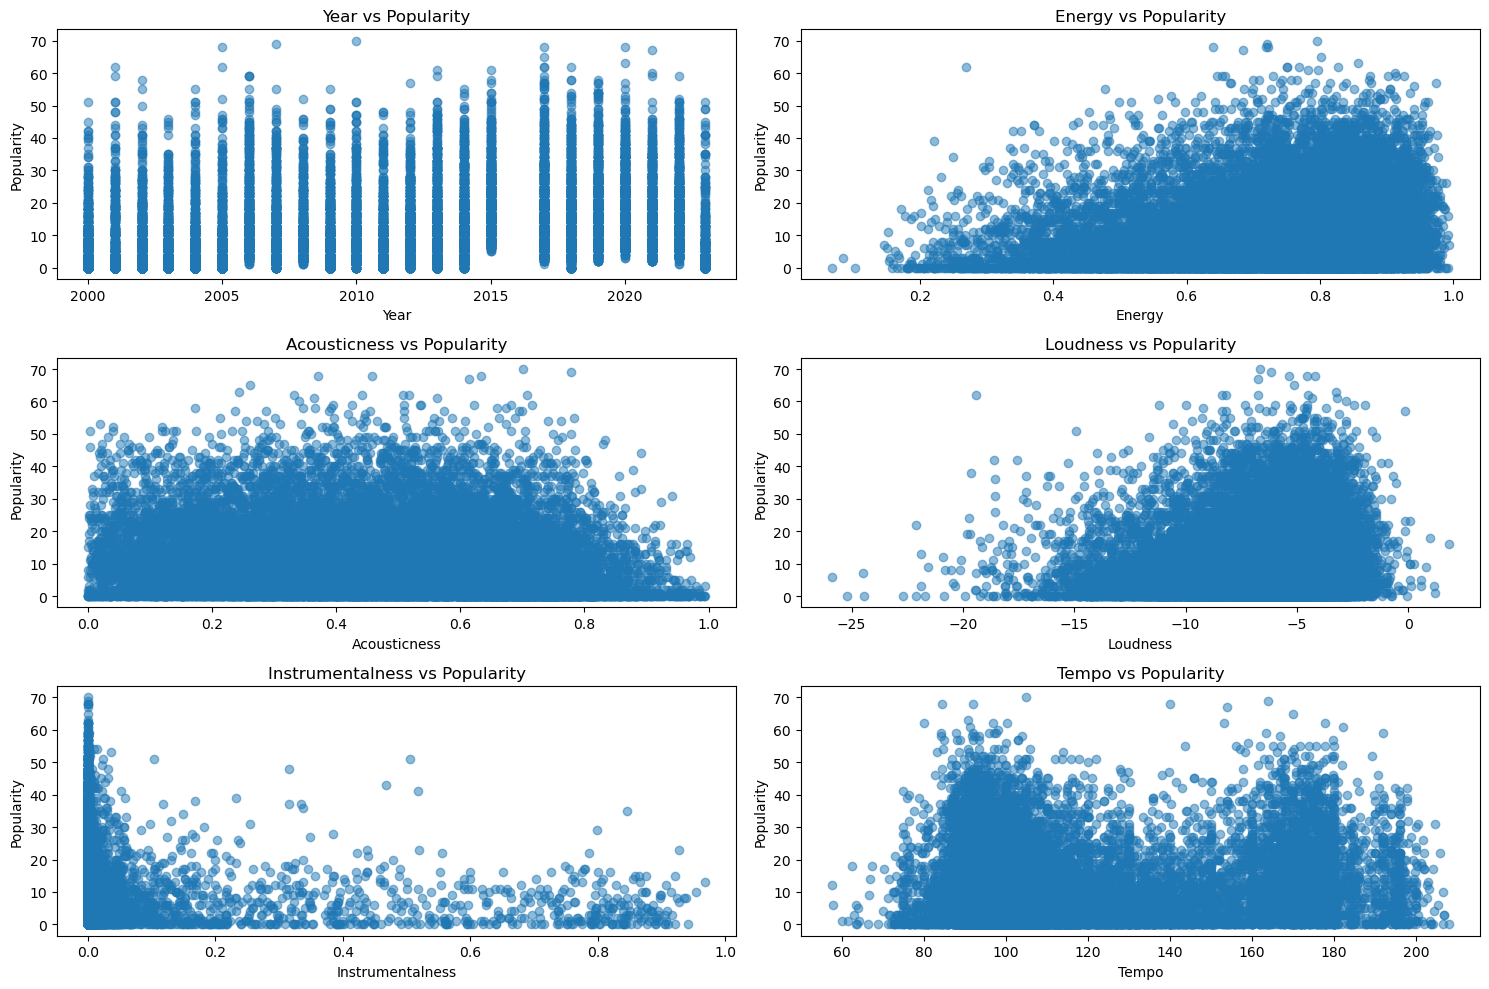

In [14]:
# Define the features to plot against popularity
features = ['year', 'energy', 'acousticness', 'loudness', 'instrumentalness', 'tempo']
target = 'popularity'

# Set up the 2x3 plot grid
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()

# Plot each feature against popularity
for i, feature in enumerate(features):
    axes[i].scatter(salsa_df[feature], salsa_df[target], alpha=0.5)
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel('Popularity')
    axes[i].set_title(f'{feature.capitalize()} vs Popularity')

# Adjust layout
plt.tight_layout()
plt.show()

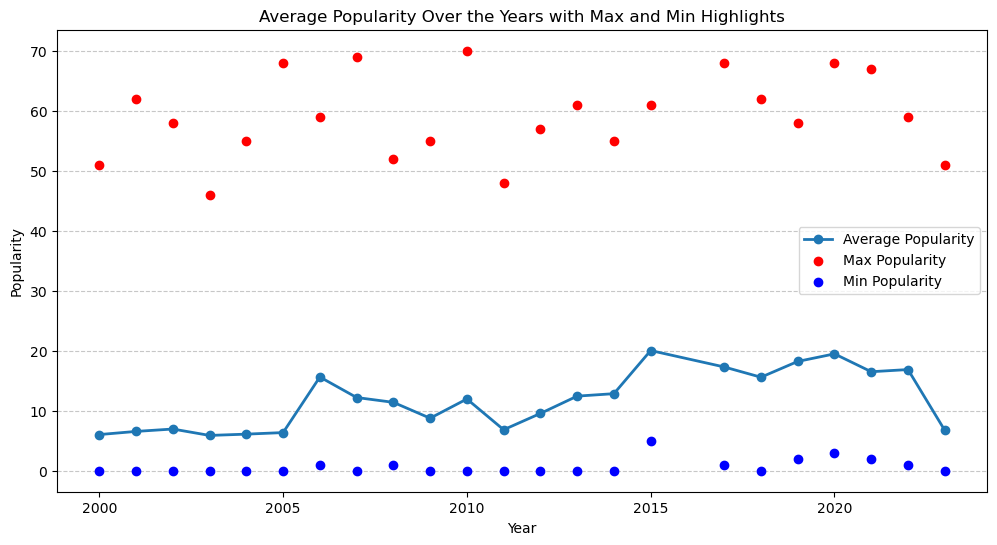

In [15]:
# Group by year and calculate average, max, and min popularity
yearly_stats = salsa_df.groupby('year')['popularity'].agg(['mean', 'max', 'min']).reset_index()

# Line plot for average popularity
plt.figure(figsize=(12, 6))
plt.plot(yearly_stats['year'], yearly_stats['mean'], label='Average Popularity', marker='o', linestyle='-', linewidth=2)

# Add red dots for max popularity
plt.scatter(yearly_stats['year'], yearly_stats['max'], color='red', label='Max Popularity', zorder=5)

# Add blue dots for min popularity
plt.scatter(yearly_stats['year'], yearly_stats['min'], color='blue', label='Min Popularity', zorder=5)

# Customize the plot
plt.title('Average Popularity Over the Years with Max and Min Highlights')
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [16]:
print(salsa_df.columns)
print(salsa_df.dtypes)

Index(['popularity', 'year', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
popularity            int64
year                  int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object


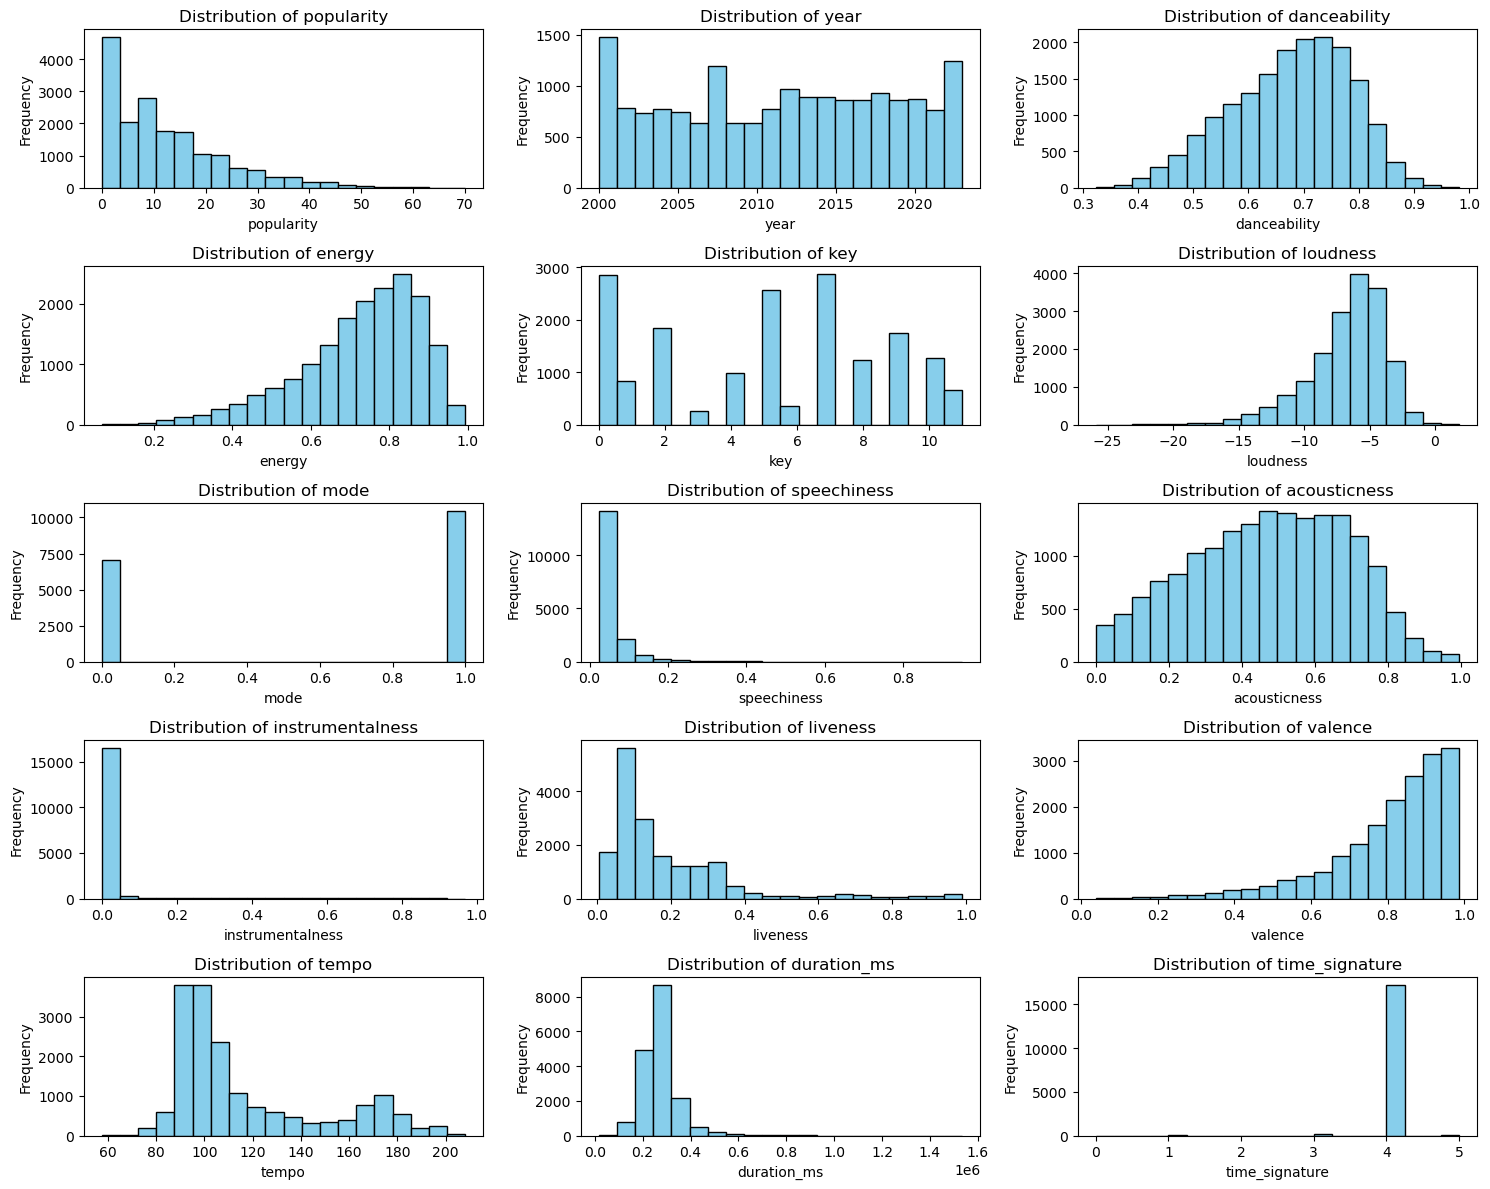

In [17]:
# Select only numerical columns
numerical_columns = salsa_df.select_dtypes(include=['number']).columns

# Create histograms for all numerical columns
plt.figure(figsize=(15, 12))  # Adjust figure size for readability
for i, col in enumerate(numerical_columns, 1):
    plt.subplot((len(numerical_columns) + 2) // 3, 3, i)  # Dynamically arrange subplots
    plt.hist(salsa_df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

plt.show()

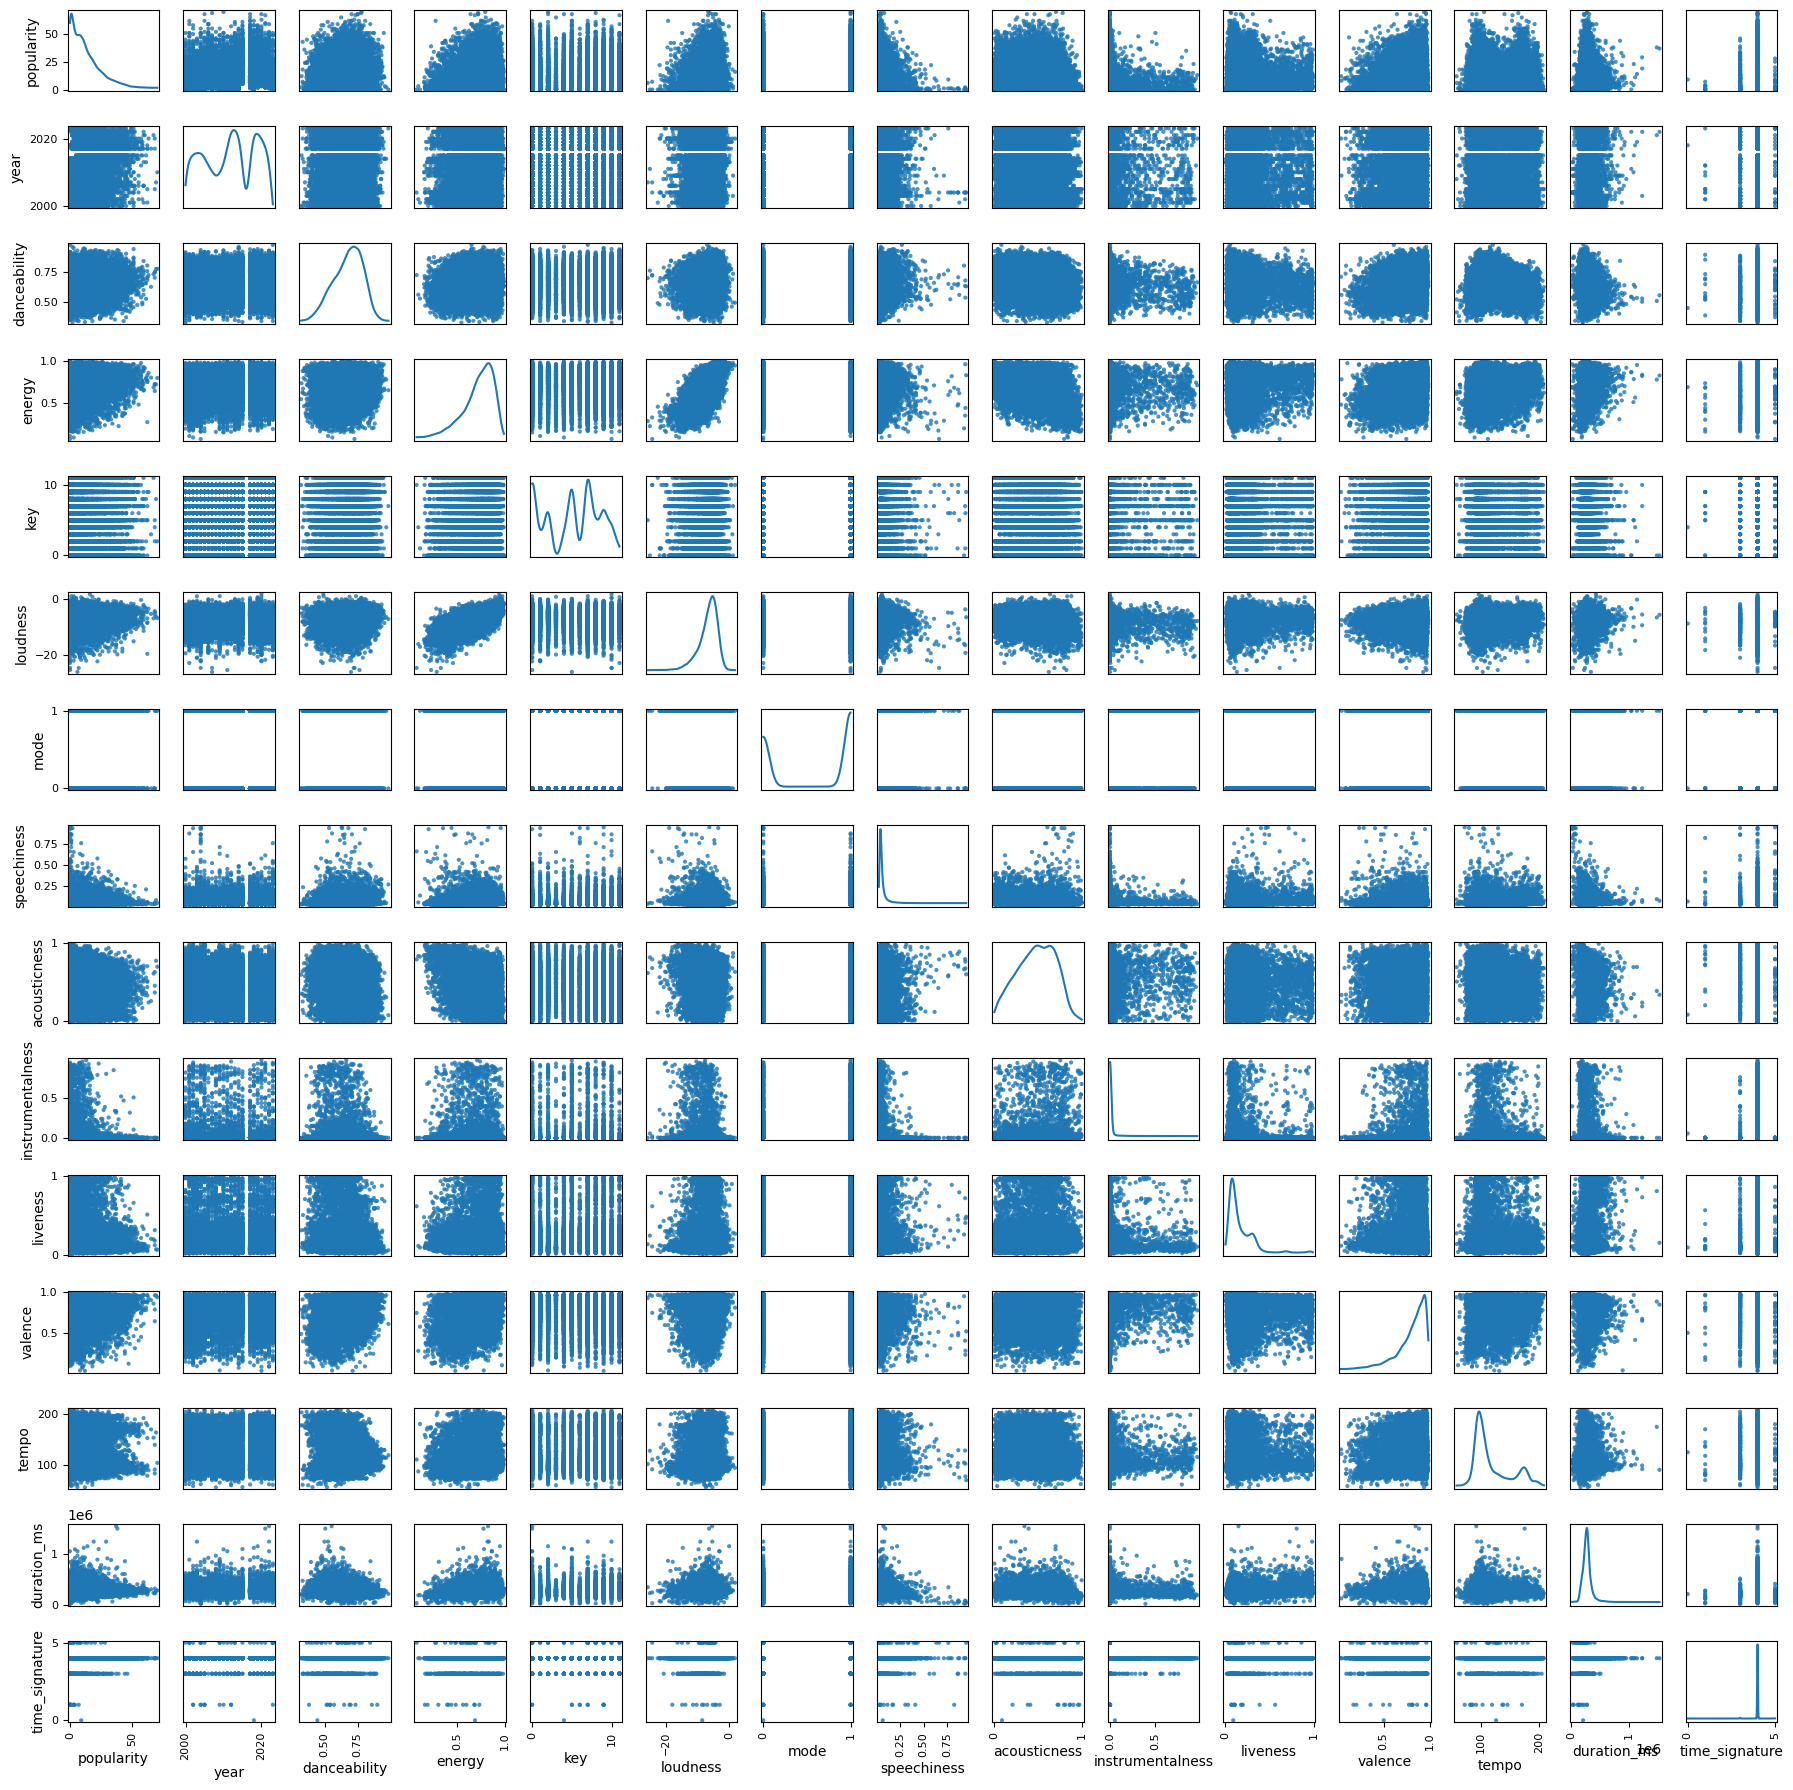

In [18]:
# Scatterplot matrix
scatter_matrix(
    salsa_df[numerical_columns],
    figsize=(18, 18),
    alpha=0.8,
    diagonal='kde'  # Optional: Show KDE on the diagonal
)
# Clean labels on the matrix
plt.tight_layout()
plt.show()

In [19]:
# Define the transformers
preprocessor = ColumnTransformer(
    transformers=[
        # ('num', StandardScaler(), numerical_features),
        ('num', MinMaxScaler(), numerical_features), 
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# re defining X & Y
X = salsa_df[numerical_features + categorical_features]
y = salsa_df['popularity']

# Fit the preprocessor to the training data
preprocessor.fit(X)

# Transform the training data
X_transformed = preprocessor.transform(X)
X_transformed

<17501x50 sparse matrix of type '<class 'numpy.float64'>'
	with 220466 stored elements in Compressed Sparse Row format>

In [20]:
transformed_feature_names = (
    list(preprocessor.named_transformers_['num'].feature_names_in_) +
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
)

# Convert sparse matrix to dense array
X_transformed_dense = X_transformed.toarray()

# Create DataFrame with correct feature names
X_transf_df = pd.DataFrame(X_transformed_dense, columns=transformed_feature_names)

# Display the transformed DataFrame
print(X_transf_df.head())


   danceability    energy  loudness  speechiness  acousticness  liveness  \
0      0.663126  0.647097  0.631454     0.018241      0.703500  0.100006   
1      0.705615  0.734513  0.672808     0.053319      0.525600  0.129497   
2      0.136571  0.672998  0.725952     0.028818      0.137638  0.587121   
3      0.476480  0.792791  0.659828     0.010362      0.431122  0.199666   
4      0.670713  0.835959  0.742465     0.032380      0.289406  0.072447   

    valence     tempo  duration_ms  mode  ...  key_7  key_8  key_9  key_10  \
0  0.741915  0.301367     0.160045   1.0  ...    1.0    0.0    0.0     0.0   
1  0.963131  0.264981     0.147154   0.0  ...    0.0    0.0    0.0     0.0   
2  0.572316  0.295689     0.202322   0.0  ...    0.0    0.0    0.0     0.0   
3  0.928368  0.282805     0.157695   1.0  ...    0.0    0.0    0.0     0.0   
4  0.904140  0.348154     0.125668   1.0  ...    0.0    0.0    1.0     0.0   

   key_11  time_signature_0  time_signature_1  time_signature_3  \
0     0

In [21]:
print('\nColumns in data frame after encoding dummy variable:\n',X_transf_df.columns.values)
print('\nNumber of rows and columns in the dataset:',X_transf_df.shape)


Columns in data frame after encoding dummy variable:
 ['danceability' 'energy' 'loudness' 'speechiness' 'acousticness'
 'liveness' 'valence' 'tempo' 'duration_ms' 'mode' 'year_2000' 'year_2001'
 'year_2002' 'year_2003' 'year_2004' 'year_2005' 'year_2006' 'year_2007'
 'year_2008' 'year_2009' 'year_2010' 'year_2011' 'year_2012' 'year_2013'
 'year_2014' 'year_2015' 'year_2017' 'year_2018' 'year_2019' 'year_2020'
 'year_2021' 'year_2022' 'year_2023' 'key_0' 'key_1' 'key_2' 'key_3'
 'key_4' 'key_5' 'key_6' 'key_7' 'key_8' 'key_9' 'key_10' 'key_11'
 'time_signature_0' 'time_signature_1' 'time_signature_3'
 'time_signature_4' 'time_signature_5']

Number of rows and columns in the dataset: (17501, 50)


In [22]:
print(f"y shape: {y.shape}")
print(f"y sample:\n{y.head()}")
print(f"y data type:\n{y.dtype}")

y shape: (17501,)
y sample:
45078    57
45079    45
45080    48
45081    47
45082    45
Name: popularity, dtype: int64
y data type:
int64


In [23]:
y_df = pd.DataFrame(y, columns=['popularity'])
popularity_median = y_df['popularity'].median()
y_df['popularity_binary'] = (y_df['popularity'] > popularity_median).astype(int)
y = y_df['popularity_binary']

0    0.506428
1    0.493572
Name: popularity_binary, dtype: float64


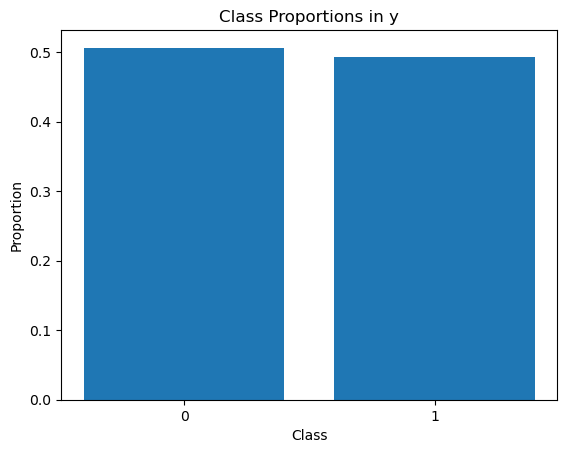

In [24]:
print(y.value_counts()/len(y))

# Distribution of class proportions of Y
class_distribution = y.value_counts(normalize=True)

# Plot the histogram
plt.bar(class_distribution.index, class_distribution.values, tick_label=class_distribution.index)
plt.xlabel('Class')
plt.ylabel('Proportion')
plt.title('Class Proportions in y')
plt.show()

In [25]:
# baseline logistic regression model

# Baseline predictions: predict the majority class for all instances
majority_class = y.value_counts().idxmax()
baseline_predictions = np.full(len(y), majority_class)

# Accuracy of the baseline model
baseline_accuracy = accuracy_score(y, baseline_predictions)

# Precision of the baseline model
baseline_precision = precision_score(y, baseline_predictions, average='binary')

# Log loss for the baseline model
# For log loss, we need probabilities: predict 100% for the majority class and 0% for the other
baseline_probabilities = np.full((len(y), 2), 0.0)
baseline_probabilities[:, majority_class] = 1.0
baseline_log_loss = log_loss(y, baseline_probabilities)

# Display baseline metrics
print(f"Baseline Accuracy: {baseline_accuracy:.4f}")
print(f"Baseline Precision: {baseline_precision:.4f}")
print(f"Baseline Log Loss: {baseline_log_loss:.4f}")

Baseline Accuracy: 0.5064
Baseline Precision: 0.0000
Baseline Log Loss: 17.0474


c:\Users\uriel\anaconda3\envs\ml37\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
try:
    baseline_auc = roc_auc_score(y, baseline_probabilities[:, 1])
except Exception as e:
    baseline_auc = str(e)

# Display the baseline AUC
{"Baseline AUC": baseline_auc}

{'Baseline AUC': 0.5}

In [27]:
# name mapping for baseline mapping for final ROC curve
fpr_baseline, tpr_baseline, _ = roc_curve(y, baseline_probabilities[:, 1])
auc_baseline = roc_auc_score(y, baseline_probabilities[:, 1])

In [28]:
# y ~ X model 
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)



Accuracy: 0.55
Confusion Matrix:
[[1220  561]
 [1031  689]]

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.69      0.61      1781
           1       0.55      0.40      0.46      1720

    accuracy                           0.55      3501
   macro avg       0.55      0.54      0.53      3501
weighted avg       0.55      0.55      0.54      3501



In [29]:
# Combine X_test and y_test for easier analysis
test_results = X_test.copy()
test_results['Actual'] = y_test
test_results['Predicted'] = y_pred

# False Positives (Predicted 1, but Actual 0)
false_positives = test_results[(test_results['Actual'] == 0) & (test_results['Predicted'] == 1)]

# False Negatives (Predicted 0, but Actual 1)
false_negatives = test_results[(test_results['Actual'] == 1) & (test_results['Predicted'] == 0)]

# Display some examples
print("False Positives:")
print(false_positives.head())

print("\nFalse Negatives:")
print(false_negatives.head())

False Positives:
         danceability  energy  loudness  speechiness  acousticness  liveness  \
1012258         0.731   0.687    -4.964       0.0388         0.797    0.0723   
919128          0.574   0.625    -8.216       0.0427         0.405    0.0589   
701345          0.578   0.954    -3.775       0.0532         0.621    0.7720   
744173          0.577   0.800    -5.400       0.0561         0.289    0.1180   
152697          0.742   0.734    -4.771       0.0335         0.709    0.0756   

         valence    tempo  duration_ms  mode  year  key  time_signature  \
1012258    0.889  148.210       345600     0  2008    2               4   
919128     0.965  149.739       412733     1  2006    0               4   
701345     0.762  104.668       376027     1  2001    0               4   
744173     0.849  126.721       444733     1  2002    7               4   
152697     0.889  147.059       313187     0  2014   10               4   

         Actual  Predicted  
1012258       0       

In [30]:
# Perform cross-validation
cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

# Display the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.2f}")

Cross-Validation Accuracy Scores: [0.52464286 0.55392857 0.52464286 0.53714286 0.535     ]
Mean CV Accuracy: 0.54
Standard Deviation of CV Accuracy: 0.01


In [31]:
preprocessor.fit(X_train)

# Transform both training and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)
cv_scores = cross_val_score(log_reg, X_train_transformed, y_train, cv=5, scoring='accuracy') # X_transformed

print(f"CV Scores with Scaled Data: {cv_scores}")

CV Scores with Scaled Data: [0.68821429 0.69035714 0.69642857 0.695      0.70321429]


In [32]:
# Perform cross-validation to get predicted labels and probabilities
y_train_pred = cross_val_predict(log_reg, X_train_transformed, y_train, cv=5)  # Predicted labels
y_train_proba = cross_val_predict(log_reg, X_train_transformed, y_train, cv=5, method='predict_proba')  # Predicted probabilities

# Calculate precision
train_precision = precision_score(y_train, y_train_pred, average='macro')  # Macro average for balanced classes

# Calculate log loss
train_log_loss = log_loss(y_train, y_train_proba)

# Display metrics
print(f"Training Precision (CV): {train_precision:.4f}")
print(f"Training Log Loss (CV): {train_log_loss:.4f}")


Training Precision (CV): 0.6948
Training Log Loss (CV): 0.5809


In [33]:
print(f"Mean CV Accuracy: {np.mean(cv_scores):.2f}")
print(f"Standard Deviation of CV Accuracy: {np.std(cv_scores):.2f}")

Mean CV Accuracy: 0.69
Standard Deviation of CV Accuracy: 0.01


In [34]:
# Logistic regression model with L1 regularization
log_reg = LogisticRegression(
    penalty='l1',            # Use L1 regularization
    solver='liblinear',      # Required solver for L1 penalty
    C=1.0,                   # Regularization strength (inverse of regularization)
    max_iter=1000            # Ensure sufficient iterations for convergence
)

# Fit the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1781
           1       0.57      0.61      0.59      1720

    accuracy                           0.58      3501
   macro avg       0.58      0.58      0.58      3501
weighted avg       0.58      0.58      0.58      3501



In [35]:
# Fit the logistic regression model on transformed training data
log_reg.fit(X_train_transformed, y_train)

y_pred = log_reg.predict(X_test_transformed)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Calculate precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.2f}")

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Retrieve coefficients
coefficients = log_reg.coef_[0]  # For binary classification (class 0 vs 1)

# Combine numerical and categorical feature names
numerical_feature_names = preprocessor.named_transformers_['num'].feature_names_in_
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Create a DataFrame mapping coefficients to features
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by the absolute value of the coefficients for interpretability
coefficients_df = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the DataFrame
print(coefficients_df)


Accuracy: 0.70
Precision: 0.70
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1781
           1       0.70      0.68      0.69      1720

    accuracy                           0.70      3501
   macro avg       0.70      0.70      0.70      3501
weighted avg       0.70      0.70      0.70      3501

             Feature  Coefficient
8        duration_ms     2.239016
25         year_2015     2.125061
3        speechiness    -1.865280
29         year_2020     1.529871
28         year_2019     1.216296
14         year_2004    -1.189155
1             energy     1.143751
32         year_2023    -1.093942
13         year_2003    -1.088587
10         year_2000    -1.073624
15         year_2005    -0.994617
31         year_2022     0.989878
12         year_2002    -0.947433
21         year_2011    -0.935803
26         year_2017     0.929864
30         year_2021     0.859406
11         year_2001    -0.832561
7      

In [36]:
y_pred = log_reg.predict(X_test_transformed)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Get the predicted probabilities for the test set
y_pred_proba = log_reg.predict_proba(X_test_transformed)

# Calculate log loss
test_log_loss = log_loss(y_test, y_pred_proba)
print(f"Test Log Loss: {test_log_loss:.4f}")

Accuracy: 0.70
Test Log Loss: 0.5748


In [37]:
# Validation and test results for reporting

# Fit the logistic regression model on the transformed training data
log_reg.fit(X_train_transformed, y_train)

# Predictions and probabilities for training data
y_train_pred = log_reg.predict(X_train_transformed)
y_train_proba = log_reg.predict_proba(X_train_transformed)

# Cross-validation predictions and probabilities
y_val_pred = cross_val_predict(log_reg, X_train_transformed, y_train, cv=5, method='predict')
y_val_proba = cross_val_predict(log_reg, X_train_transformed, y_train, cv=5, method='predict_proba')

# Predictions and probabilities for test data
y_test_pred = log_reg.predict(X_test_transformed)
y_test_proba = log_reg.predict_proba(X_test_transformed)

# Calculate metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_log_loss = log_loss(y_train, y_train_proba)

# Calculate metrics for validation data
val_accuracy = accuracy_score(y_train, y_val_pred)
val_precision = precision_score(y_train, y_val_pred)
val_log_loss = log_loss(y_train, y_val_proba)

# Calculate metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_log_loss = log_loss(y_test, y_test_proba)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Log Loss: {train_log_loss:.4f}")

print("\nValidation Metrics (5-Fold Cross-Validation):")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Log Loss: {val_log_loss:.4f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Log Loss: {test_log_loss:.4f}")

# Detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Training Metrics:
Accuracy: 0.6961, Precision: 0.6995, Log Loss: 0.5776

Validation Metrics (5-Fold Cross-Validation):
Accuracy: 0.6946, Precision: 0.6979, Log Loss: 0.5809

Test Metrics:
Accuracy: 0.6998, Precision: 0.7021, Log Loss: 0.5748

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1781
           1       0.70      0.68      0.69      1720

    accuracy                           0.70      3501
   macro avg       0.70      0.70      0.70      3501
weighted avg       0.70      0.70      0.70      3501



In [38]:


# Compute AUC for training data
train_auc = roc_auc_score(y_train, y_train_proba[:, 1])

# Compute AUC for validation data using cross-validated probabilities
val_auc = roc_auc_score(y_train, y_val_proba[:, 1])

# Compute AUC for test data
test_auc = roc_auc_score(y_test, y_test_proba[:, 1])

# Display the AUC values
{
    "Training AUC": train_auc,
    "Validation AUC": val_auc,
    "Test AUC": test_auc
}


{'Training AUC': 0.7660711951574742,
 'Validation AUC': 0.762514166229668,
 'Test AUC': 0.7703552028518078}

In [39]:
# Logistic Regressionname mapping  for final ROC
fpr_log, tpr_log, _ = roc_curve(y_train, y_val_proba[:, 1])
auc_log = roc_auc_score(y_train, y_val_proba[:, 1])

## FFNN

In [40]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Define the learning rate as a hyperparameter
learning_rate = 0.002

# Define the neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))  # Dropout for regularization
model.add(Dense(1, activation='sigmoid'))  # Sigmoid activation for binary classification

# Compile the model with accuracy and precision as metrics
optimizer = Adam(learning_rate=learning_rate)
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy', 'Precision']
)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_data=(X_val_scaled, y_val),
    epochs=100,
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]
)

# Evaluate on the test set
test_loss, test_accuracy, test_precision = model.evaluate(X_test_scaled, y_test, verbose=0)

# Predictions and probabilities for further metrics
y_train_pred_proba = model.predict(X_train_scaled)
y_train_pred = (y_train_pred_proba > 0.5).astype(int)

y_val_pred_proba = model.predict(X_val_scaled)
y_val_pred = (y_val_pred_proba > 0.5).astype(int)

y_test_pred_proba = model.predict(X_test_scaled)
y_test_pred = (y_test_pred_proba > 0.5).astype(int)

# Log loss for training, validation, and test
train_log_loss = log_loss(y_train, y_train_pred_proba)
val_log_loss = log_loss(y_val, y_val_pred_proba)
test_log_loss = log_loss(y_test, y_test_pred_proba)

# AUC for training, validation, and test sets
train_auc = roc_auc_score(y_train, y_train_pred_proba)
val_auc = roc_auc_score(y_val, y_val_pred_proba)
test_auc = roc_auc_score(y_test, y_test_pred_proba)

# Print results
print("\nTraining Metrics:")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}, Precision: {precision_score(y_train, y_train_pred):.4f}, Log Loss: {train_log_loss:.4f}, AUC: {train_auc:.4f}")

print("\nValidation Metrics:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}, Precision: {precision_score(y_val, y_val_pred):.4f}, Log Loss: {val_log_loss:.4f}, AUC: {val_auc:.4f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Log Loss: {test_log_loss:.4f}, AUC: {test_auc:.4f}")


Epoch 1/100
329/329 [==============================] - 1s 2ms/step - loss: 0.6383 - accuracy: 0.6378 - precision: 0.6275 - val_loss: 0.6219 - val_accuracy: 0.6534 - val_precision: 0.6312
Epoch 2/100
329/329 [==============================] - 0s 1ms/step - loss: 0.6279 - accuracy: 0.6545 - precision: 0.6424 - val_loss: 0.6200 - val_accuracy: 0.6614 - val_precision: 0.6605
Epoch 3/100
329/329 [==============================] - 0s 1ms/step - loss: 0.6248 - accuracy: 0.6589 - precision: 0.6544 - val_loss: 0.6285 - val_accuracy: 0.6500 - val_precision: 0.6128
Epoch 4/100
329/329 [==============================] - 0s 1ms/step - loss: 0.6238 - accuracy: 0.6591 - precision: 0.6512 - val_loss: 0.6196 - val_accuracy: 0.6551 - val_precision: 0.6302
Epoch 5/100
329/329 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.6622 - precision: 0.6553 - val_loss: 0.6177 - val_accuracy: 0.6563 - val_precision: 0.6480
Epoch 6/100
329/329 [==============================] - 0s 1ms/ste

In [42]:
# FFNN name mapping for final ROC curve
fpr_ffnn, tpr_ffnn, _ = roc_curve(y_val, y_val_pred_proba)
auc_ffnn = roc_auc_score(y_val, y_val_pred_proba)

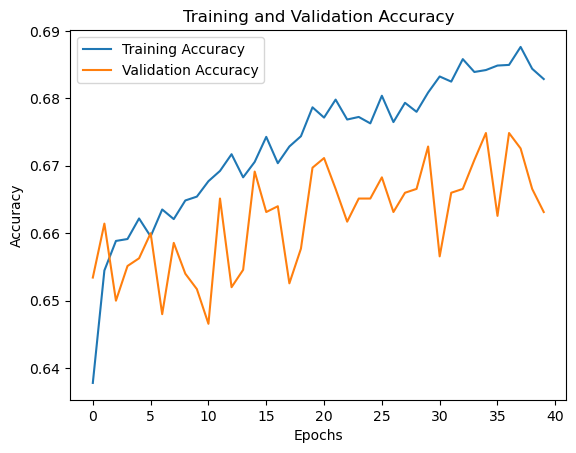

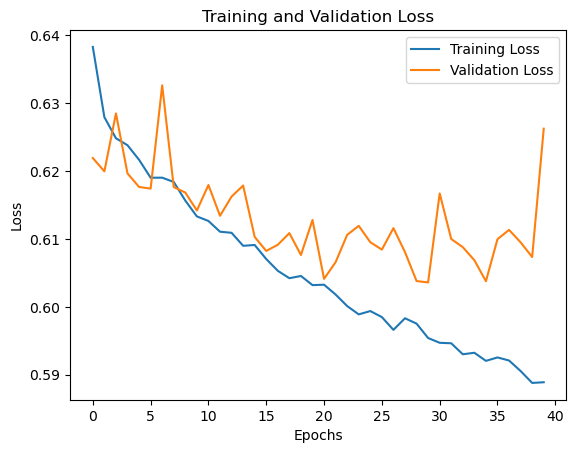

In [43]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [44]:
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

## Random Forest Classifier

In [45]:
X = salsa_df[numerical_features + categorical_features]
y = salsa_df['popularity']
y_df = pd.DataFrame(y, columns=['popularity'])
popularity_median = y_df['popularity'].median()
y_df['popularity_binary'] = (y_df['popularity'] > popularity_median).astype(int)
y = y_df['popularity_binary']

In [46]:
# Assuming X and y are defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,      # Number of trees in the forest
    max_depth=None,        # Maximum depth of the tree (None allows the trees to grow until all leaves are pure)
    random_state=42,       # Random state for reproducibility
    class_weight="balanced"  # To handle class imbalance
)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Evaluate the model
# Training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)
train_f1 = f1_score(y_train, y_train_pred)

# Test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")

# Detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Training Metrics:
Accuracy: 0.9999, Precision: 1.0000, Recall: 0.9999, F1-Score: 0.9999

Test Metrics:
Accuracy: 0.7069, Precision: 0.7158, Recall: 0.6692, F1-Score: 0.6917

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1781
           1       0.72      0.67      0.69      1720

    accuracy                           0.71      3501
   macro avg       0.71      0.71      0.71      3501
weighted avg       0.71      0.71      0.71      3501



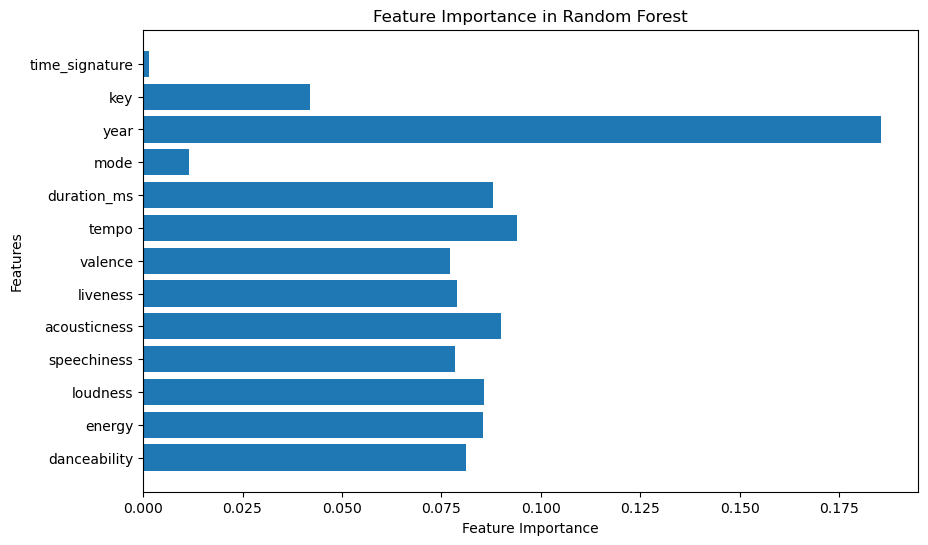

In [47]:
# Get feature importances for unscaled data
feature_importances = rf_model.feature_importances_

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

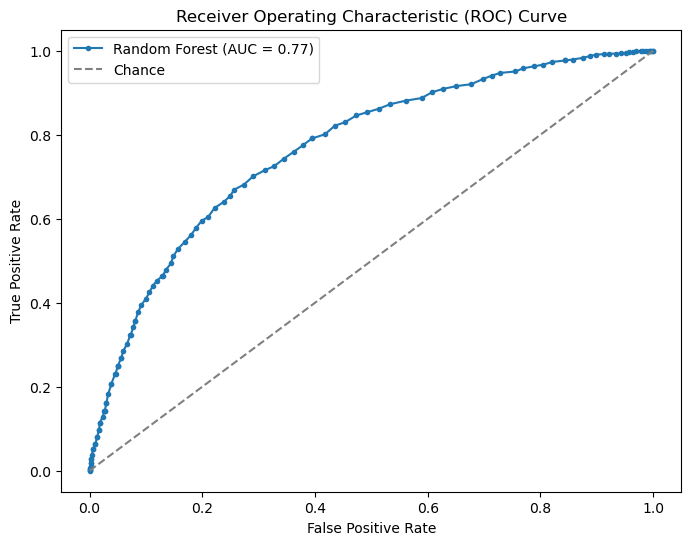

In [48]:
# Get predicted probabilities for the test set
y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


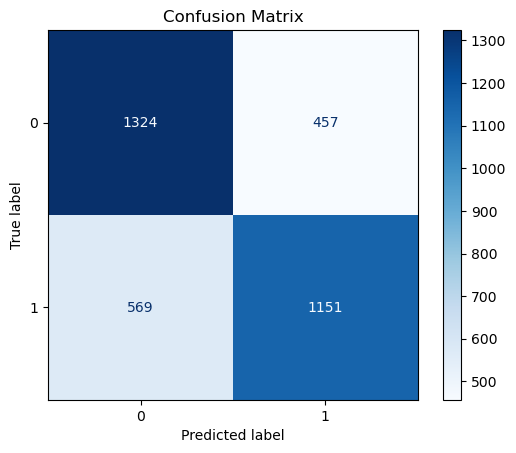

In [49]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [50]:
# Define the transformers again, just in case
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

# Fit the preprocessor to the data
preprocessor.fit(X)

# Transform the data
X_transformed = preprocessor.transform(X)

# Convert to dense matrix if necessary
if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

# Split the transformed data
X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.2, random_state=42
)

# Define and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test_transformed)

# Test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

# Print results
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")

print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")

# Detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Training Metrics:
Accuracy: 0.9999, Precision: 1.0000, Recall: 0.9999, F1-Score: 0.9999

Test Metrics:
Accuracy: 0.7081, Precision: 0.7162, Recall: 0.6721, F1-Score: 0.6935

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1781
           1       0.72      0.67      0.69      1720

    accuracy                           0.71      3501
   macro avg       0.71      0.71      0.71      3501
weighted avg       0.71      0.71      0.71      3501



In [51]:
# Ensure the preprocessor is fitted on the training data

# Transform both training and test data
X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

# Convert to dense if sparse
if hasattr(X_train_transformed, "toarray"):
    X_train_transformed = X_train_transformed.toarray()
    X_test_transformed = X_test_transformed.toarray()

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_transformed, y_train)

# Get predicted probabilities for the test set
y_test_proba = rf_model.predict_proba(X_test_transformed)

# Calculate log loss
rf_log_loss = log_loss(y_test, y_test_proba)

print(f"Log Loss for Random Forest Classifier: {rf_log_loss:.4f}")

Log Loss for Random Forest Classifier: 0.5698


In [52]:
# Validation and Testing results for reporting

# Perform cross-validation to validate the model
y_val_pred = cross_val_predict(rf_model, X_train_transformed, y_train, cv=5, method='predict')  # Predicted labels
y_val_proba = cross_val_predict(rf_model, X_train_transformed, y_train, cv=5, method='predict_proba')  # Predicted probabilities

# Calculate validation metrics
val_accuracy = accuracy_score(y_train, y_val_pred)
val_precision = precision_score(y_train, y_val_pred)
val_recall = recall_score(y_train, y_val_pred)
val_f1 = f1_score(y_train, y_val_pred)
val_log_loss = log_loss(y_train, y_val_proba)

# Train the Random Forest model on the full transformed training set
rf_model.fit(X_train_transformed, y_train)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test_transformed)
y_test_proba = rf_model.predict_proba(X_test_transformed)

# Calculate test metrics
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_log_loss = log_loss(y_test, y_test_proba)

# Print validation metrics
print("Validation Metrics (5-Fold Cross-Validation):")
print(f"Accuracy: {val_accuracy:.4f}, Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1-Score: {val_f1:.4f}, Log Loss: {val_log_loss:.4f}")

# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}, Log Loss: {test_log_loss:.4f}")

# Detailed classification report for the test set
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

Validation Metrics (5-Fold Cross-Validation):
Accuracy: 0.7061, Precision: 0.7187, Recall: 0.6659, F1-Score: 0.6913, Log Loss: 0.5735

Test Metrics:
Accuracy: 0.7081, Precision: 0.7162, Recall: 0.6721, F1-Score: 0.6935, Log Loss: 0.5698

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1781
           1       0.72      0.67      0.69      1720

    accuracy                           0.71      3501
   macro avg       0.71      0.71      0.71      3501
weighted avg       0.71      0.71      0.71      3501



In [53]:
# Compute AUC for validation data using cross-validated probabilities
val_auc_rf = roc_auc_score(y_train, y_val_proba[:, 1])

# Compute AUC for test data
test_auc_rf = roc_auc_score(y_test, y_test_proba[:, 1])

# Display the AUC values for the Random Forest model
{
    "Validation AUC (Random Forest)": val_auc_rf,
    "Test AUC (Random Forest)": test_auc_rf
}

{'Validation AUC (Random Forest)': 0.7749332071609174,
 'Test AUC (Random Forest)': 0.7765246529908727}

In [54]:
# Random Forest name mapping for final ROC plot
fpr_rf, tpr_rf, _ = roc_curve(y_train, y_val_proba[:, 1])
auc_rf = roc_auc_score(y_train, y_val_proba[:, 1])

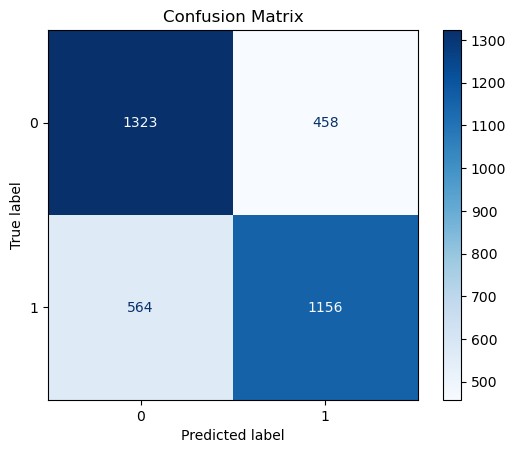

In [55]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

# Plot the confusion matrix
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

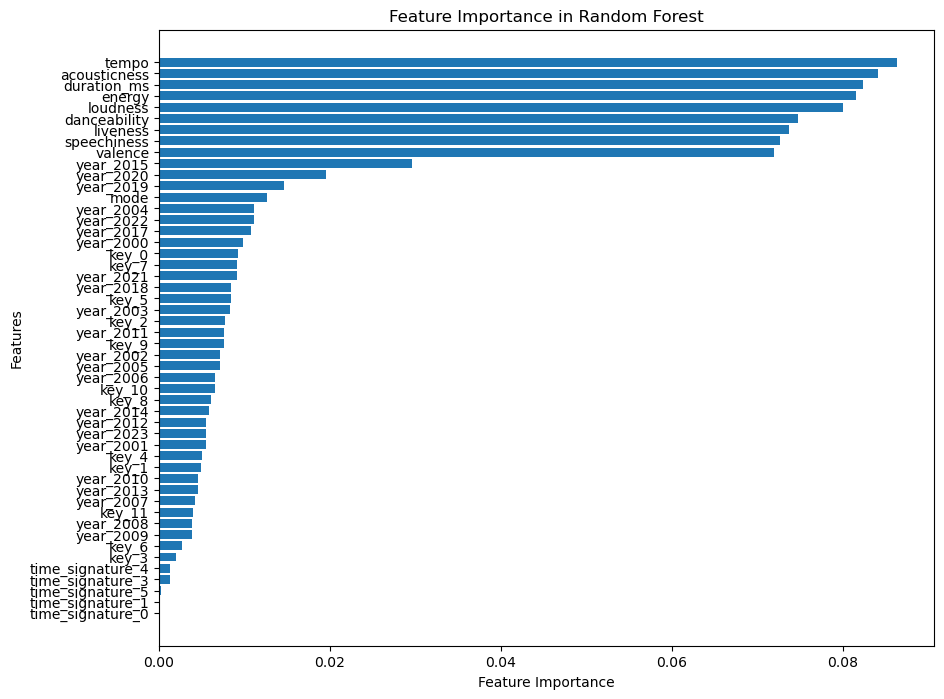

In [56]:
# Get feature importances

# Extract feature names from ColumnTransformer first
numerical_feature_names = numerical_features
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(numerical_feature_names) + list(categorical_feature_names)

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

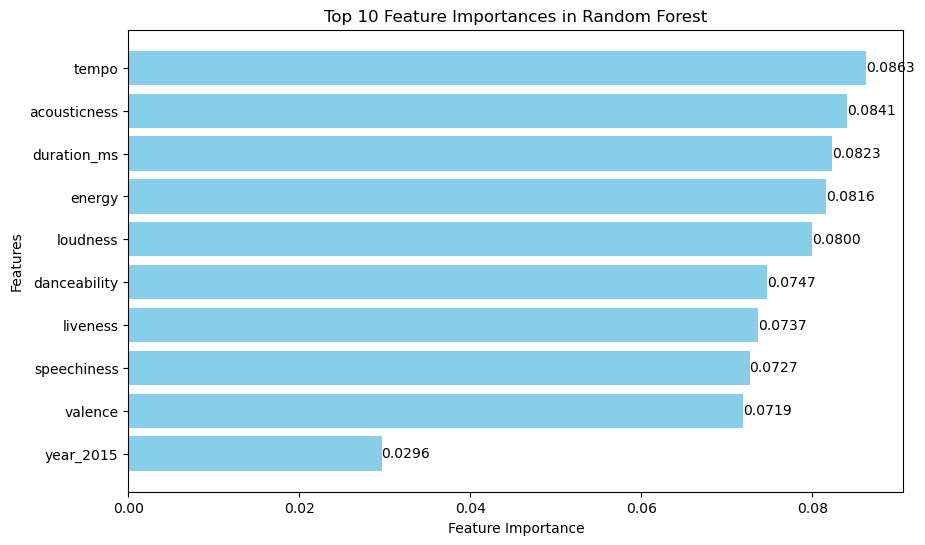

In [57]:
# Plot the top 10 feature importances
top_10_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')

# Add importance values as text labels
for bar, importance in zip(bars, top_10_features['Importance']):
    plt.text(
        bar.get_width(),  # Position the text at the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Center the text vertically
        f'{importance:.4f}',  # Format the importance value
        va='center'  # Vertical alignment
    )

plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances in Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()

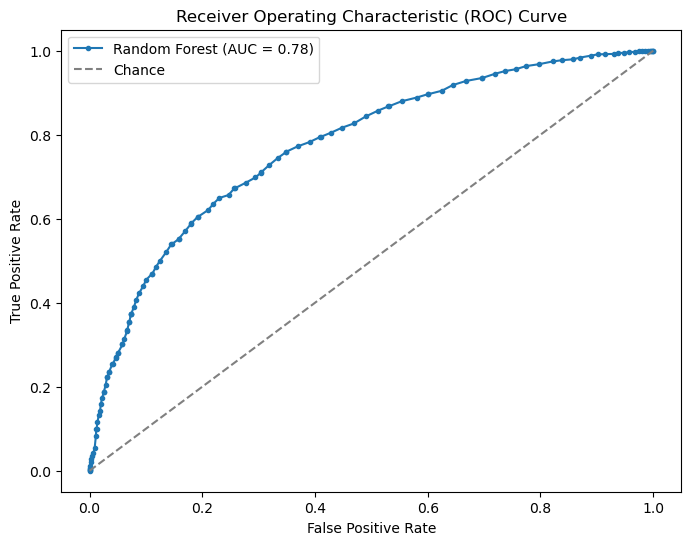

In [58]:
# Get predicted probabilities for the positive class
y_test_proba_positive = y_test_proba[:, 1]  # Extract probabilities for class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba_positive)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

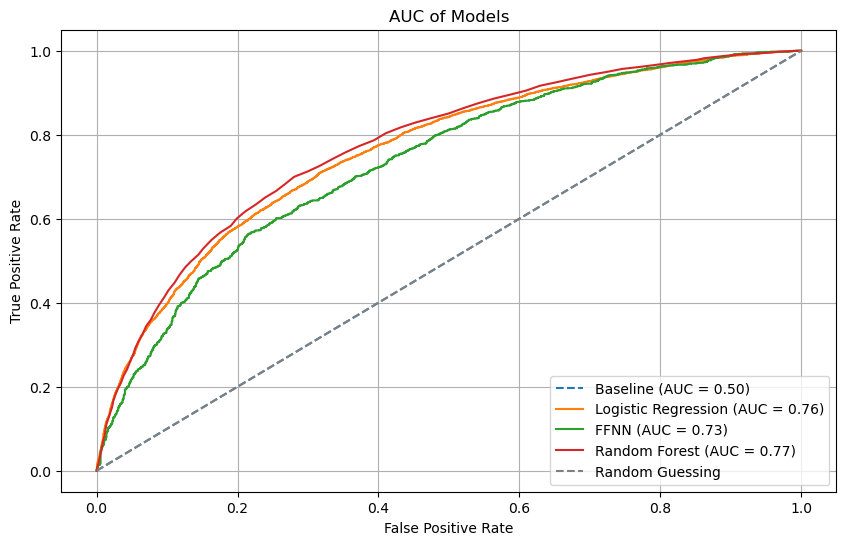

In [59]:
# Plot ROC curves
plt.figure(figsize=(10, 6))

# Baseline
plt.plot(fpr_baseline, tpr_baseline, label=f"Baseline (AUC = {auc_baseline:.2f})", linestyle="--")

# Logistic Regression
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")

# FFNN
plt.plot(fpr_ffnn, tpr_ffnn, label=f"FFNN (AUC = {auc_ffnn:.2f})")

# Random Forest
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")

# Random guessing
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guessing")

# Plot customization
plt.title("AUC of Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()
